In [0]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import *

In [0]:
import pandas as pd 
from gensim import models, corpora 
import spacy
import re
from spacy.tokenizer import Tokenizer
from spacy.tokenizer import _get_regex_pattern
nlp = spacy.load("en_core_web_sm") 
import numpy as np 
from nltk.corpus import stopwords
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!pip install tweet-preprocessor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re #regular expressions
import string 

from nltk.corpus import stopwords
from nltk import word_tokenize
import preprocessor as p

In [0]:
d = pd.read_csv("Tweets.csv")

In [0]:
reuse = False

In [0]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)

In [0]:
d['text']= d['text'].replace({'\n':" ","\t":" "})

In [0]:
d

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [0]:
d.drop(columns=['tweet_id','airline_sentiment_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord'],inplace=True)

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   airline_sentiment          14640 non-null  object 
 1   negativereason             9178 non-null   object 
 2   negativereason_confidence  10522 non-null  float64
 3   airline                    14640 non-null  object 
 4   name                       14640 non-null  object 
 5   retweet_count              14640 non-null  int64  
 6   text                       14640 non-null  object 
 7   tweet_created              14640 non-null  object 
 8   tweet_location             9907 non-null   object 
 9   user_timezone              9820 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [0]:
d

,airline_sentiment,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...
14635,positive,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,negative,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,neutral,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,negative,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [0]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
d['airline_sentiment']= le.fit_transform(d['airline_sentiment']) 

In [0]:
d['negativereason'] = d['negativereason'].fillna("no")
d['negativereason'].unique()




array(['no', 'Bad Flight', "Can't Tell", 'Late Flight', 'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight', 'Damaged Luggage', 'longlines'], dtype=object)

In [0]:
le = LabelEncoder() 
  
d['negativereason']= le.fit_transform(d['negativereason']) 

In [0]:
d['negativereason_confidence'] = d['negativereason_confidence'].fillna(0)

  
d['negativereason_confidence']= le.fit_transform(d['negativereason_confidence']) 


In [0]:
d['tweet_location'].unique()

array([nan, 'Lets Play', 'San Francisco CA', 'Los Angeles', ..., 'Pueblo, CO', 'Columbus, OH, USA',
       'Milwaukee County, Wisconsin', 'Nigeria,lagos'], dtype=object)

In [0]:
d['tweet_location'] = d['tweet_location'].fillna("none")

le = LabelEncoder() 
  
d['tweet_location']= le.fit_transform(d['tweet_location']) 

In [0]:
d['user_timezone'].unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)', 'Central Time (US & Canada)', 'America/New_York',
       ..., 'America/Boise', 'Canberra', 'Perth', 'La Paz'], dtype=object)

In [0]:
d['user_timezone'] = d['user_timezone'].fillna("none")

le = LabelEncoder() 
  
d['user_timezone']= le.fit_transform(d['user_timezone']) 

In [0]:
d

,airline_sentiment,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,1,10,0,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,2860,31
1,2,10,0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,2860,62
2,1,10,0,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,1219,27
3,0,0,1295,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,2860,62
4,0,1,1409,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,2860,62
...,...,...,...,...,...,...,...,...,...,...
14635,2,10,0,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,2860,85
14636,0,3,1409,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,2324,85
14637,1,10,0,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,1670,85
14638,0,3,946,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,1599,31


In [0]:
d['airline'] = d['airline'].fillna("none")

le = LabelEncoder() 
  
d['airline']= le.fit_transform(d['airline']) 

In [0]:
d.drop(columns =['name'],inplace = True)

In [0]:
d

,airline_sentiment,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,1,10,0,5,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,2860,31
1,2,10,0,5,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,2860,62
2,1,10,0,5,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,1219,27
3,0,0,1295,5,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,2860,62
4,0,1,1409,5,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,2860,62
...,...,...,...,...,...,...,...,...,...
14635,2,10,0,0,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,2860,85
14636,0,3,1409,0,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,2324,85
14637,1,10,0,0,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,1670,85
14638,0,3,946,0,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,1599,31


In [0]:
d.drop(columns =['tweet_created'],inplace = True)

In [0]:
d

,airline_sentiment,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone
0,1,10,0,5,0,@VirginAmerica What @dhepburn said.,2860,31
1,2,10,0,5,0,@VirginAmerica plus you've added commercials t...,2860,62
2,1,10,0,5,0,@VirginAmerica I didn't today... Must mean I n...,1219,27
3,0,0,1295,5,0,@VirginAmerica it's really aggressive to blast...,2860,62
4,0,1,1409,5,0,@VirginAmerica and it's a really big bad thing...,2860,62
...,...,...,...,...,...,...,...,...
14635,2,10,0,0,0,@AmericanAir thank you we got on a different f...,2860,85
14636,0,3,1409,0,0,@AmericanAir leaving over 20 minutes Late Flig...,2324,85
14637,1,10,0,0,0,@AmericanAir Please bring American Airlines to...,1670,85
14638,0,3,946,0,0,"@AmericanAir you have my money, you change my ...",1599,31


In [0]:
def remove_stopwords(inp_text):
    stop = nltk.corpus.stopwords.words('english')
    punc = string.punctuation
    stop.append(punc)
    whitelist = ["n't", "not", "no"]
    clean_words = []
    words = nltk.word_tokenize(inp_text)
    for word in words:
        if word not in stop or word not in whitelist and len(word)>1:
            clean_words.append(word)
    return " ".join(clean_words)

In [0]:
def remove_mentions(input_text):
        return re.sub(r'@ \w+', '', input_text)

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
d.text = d.text.apply(remove_stopwords).apply(remove_mentions)
d.head()

,airline_sentiment,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone
0,1,10,0,5,0,What said .,2860,31
1,2,10,0,5,0,plus you 've added commercials to the experie...,2860,62
2,1,10,0,5,0,I did n't today ... Must mean I need to take ...,1219,27
3,0,0,1295,5,0,it 's really aggressive to blast obnoxious ``...,2860,62
4,0,1,1409,5,0,and it 's really big bad thing about it,2860,62


In [0]:
import tokenize

In [0]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(d, stratify = d['airline_sentiment'], test_size = 0.3)

df_trn.shape, df_val.shape

((10248, 8), (4392, 8))

In [0]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
data_clas.show_batch()

text,target
xxbos 3,0
xxbos 3,0
xxbos 10,2
xxbos 10,2
xxbos 6,0


In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')
data_lm = load_data('./', 'data_lm_export.pkl')
data_clas = load_data('./', 'data_clas_export.pkl', bs=64)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 3.31E-01


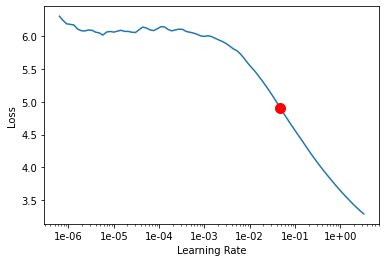

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.864425,3.018613,0.498772,00:00
1,3.334315,1.358641,0.625893,00:00


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.482044,0.986911,0.685938,00:00
1,1.226928,0.966169,0.685938,00:00


In [0]:
learn.predict("How do", n_words=10)

'How do 4 1 2 2 0 2 0 0 3 8'

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (10248 items)
x: TextList
xxbos 10,xxbos 1,xxbos 2,xxbos 10,xxbos 1
y: CategoryList
1,0,0,1,0
Path: .;

Valid: LabelList (4392 items)
x: TextList
xxbos 10,xxbos 8,xxbos 7,xxbos 2,xxbos 3
y: CategoryList
1,0,0,0,0
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(24, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(24, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClass

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 7.59E-02


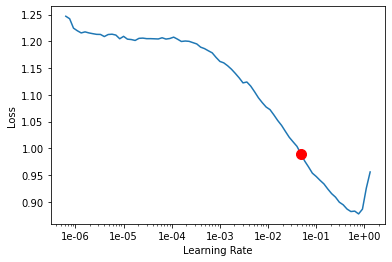

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.554121,0.358249,0.838570,00:03
1,0.475581,0.312772,0.838570,00:03


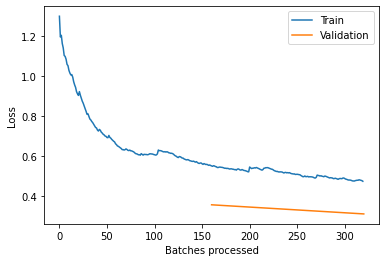

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.351153,0.258643,0.838570,00:03
1,0.339677,0.266210,0.838570,00:03
2,0.332266,0.261696,0.838570,00:03
3,0.316472,0.257384,0.838570,00:03


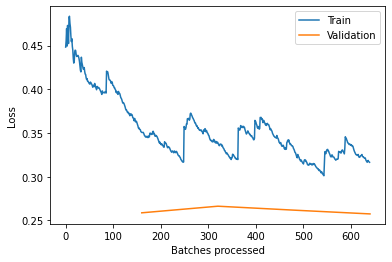

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.289257,0.256044,0.838570,00:04
1,0.264415,0.255382,0.838570,00:04
2,0.260747,0.255357,0.838570,00:04
3,0.264795,0.255378,0.838570,00:04


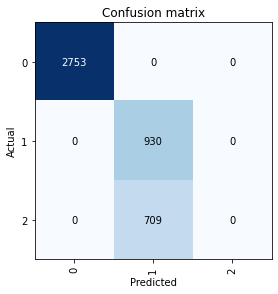

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[(2, 1, 709)]

In [0]:
learn.predict("bad experience")

(Category tensor(0), tensor(0), tensor([9.9975e-01, 1.4795e-04, 1.0402e-04]))

In [0]:

learn.export()

In [0]:
d

,airline_sentiment,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone
0,1,10,0,5,0,What said .,2860,31
1,2,10,0,5,0,plus you 've added commercials to the experie...,2860,62
2,1,10,0,5,0,I did n't today ... Must mean I need to take ...,1219,27
3,0,0,1295,5,0,it 's really aggressive to blast obnoxious ``...,2860,62
4,0,1,1409,5,0,and it 's really big bad thing about it,2860,62
...,...,...,...,...,...,...,...,...
14635,2,10,0,0,0,thank you we got on different flight to Chica...,2860,85
14636,0,3,1409,0,0,leaving over 20 minutes Late Flight . No warn...,2324,85
14637,1,10,0,0,0,Please bring American Airlines to # BlackBerry10,1670,85
14638,0,3,946,0,0,"you have my money , you change my flight , an...",1599,31
